<a href="https://colab.research.google.com/github/mixa15341/Data_Minimg/blob/main/6/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((140, 4), (10, 4))

#### 1.2. Обучите модель KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [4]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_pred)
accuracy


1.0

#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [5]:
def train_knn_with(n_neighbours: int, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [8]:
import numpy as np
results = pd.DataFrame(columns=['k', 'Точность'])

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results = pd.concat([results, pd.DataFrame({'k': [k], 'Точность': [accuracy]})], ignore_index=True)

<ipython-input-8-d3b570be0883>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'k': [k], 'Точность': [accuracy]})], ignore_index=True)


In [9]:
  results

,k,Точность
0,1,0.9
1,2,0.9
2,3,0.9
3,4,0.9
4,5,0.9
...,...,...
94,95,0.6
95,96,0.6
96,97,0.6
97,98,0.6


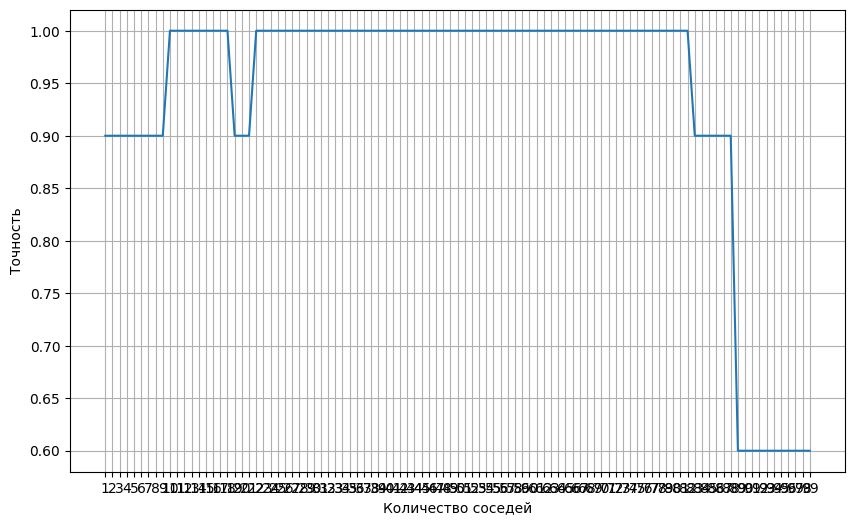

Наилучшее значение k: 10
Максимальная точность: 1.00


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['Точность'])
plt.xticks(range(1, 100))
plt.grid(True)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.show()

best_k = results.loc[results['Точность'].idxmax()]['k']
best_accuracy = results['Точность'].max()

print(f"Наилучшее значение k: {best_k}")
print(f"Максимальная точность: {best_accuracy:.2f}")

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [11]:
from sklearn.metrics import pairwise_distances

point1 = [5, 0, 2]
point2 = [2, 7, 2]

p = 2

for p in range(-2, 10):
    distance = pairwise_distances([point1], [point2], metric='minkowski', p=p)
    print(f'Расстояние Минковского (p={p}): {distance[0][0]}')

Расстояние Минковского (p=-2): 0.0
Расстояние Минковского (p=-1): 0.0
Расстояние Минковского (p=0): inf
Расстояние Минковского (p=1): 10.0
Расстояние Минковского (p=2): 7.615773105863909
Расстояние Минковского (p=3): 7.179054352068318
Расстояние Минковского (p=4): 7.058305379361579
Расстояние Минковского (p=5): 7.0201255082243295
Расстояние Минковского (p=6): 7.007210536682955
Расстояние Минковского (p=7): 7.00265258162485
Расстояние Минковского (p=8): 7.0009953541340835
Расстояние Минковского (p=9): 7.000379289075169


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
# Ваш код здесь


#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
# Ваш код здесь


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
# Ваш код здесь


#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
# Ваш код здесь


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь


Затем нормализуйте данные:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [ ]:
# Ваш код здесь

#### 3.3. Проверьте качество работы модели

In [ ]:
# Ваш код здесь


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [ ]:
# Ваш код здесь


### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [ ]:
# Ваш код здесь


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
# Ваш код здесь


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
# Ваш код здесь


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
# Ваш код здесь


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
# Ваш код здесь


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [12]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [ ]:
# Ваш код здесь


### Визуализируйте ваши данные на графике

In [ ]:
# Ваш код здесь


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь


#### 1.2. Обучите модель KNN на 50 соседях

In [ ]:
# Ваш код здесь


#### 1.3. Проверьте качество работы модели

In [ ]:
# Ваш код здесь


#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
# Ваш код здесь


#### 1.5. Выберите топ  k  соседей


In [ ]:
# Ваш код здесь


#### 1.6. Выведите финальное предсказание для этого объекта

In [ ]:
# Ваш код здесь


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
# Ваш код здесь


In [ ]:
# Ваш код здесь


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [ ]:
# Ваш код здесь


### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [ ]:
# Ваш код здесь


#### 2.2. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
# Ваш код здесь


#### 2.4. Выберите топ  k  соседей


In [ ]:
# Ваш код здесь


#### 2.5. Рассчитайте вес для каждого соседа

In [ ]:
# Ваш код здесь


#### 2.6. Выведите финальное предсказание для этого объекта

In [ ]:
# Ваш код здесь


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
# Ваш код здесь


In [ ]:
# Ваш код здесь


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

In [ ]:
# Ваш код здесь


### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [14]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


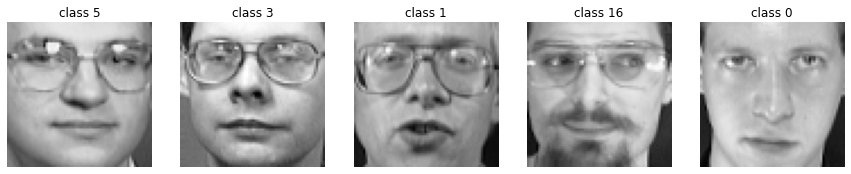

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [ ]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь


#### 3.1.2. Обучите модель KNN на 50 соседях

In [ ]:
# Ваш код здесь


#### 3.1.3. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
# Ваш код здесь


#### 3.2.2. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [ ]:
# Ваш код здесь


#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [ ]:
# Ваш код здесь


#### 3.3.3. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [ ]:
# Ваш код здесь


### Отрисуйте данные на графике

In [ ]:
# Ваш код здесь


### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь


#### 4.2. Обучите модель KNN на 100 соседях


In [ ]:
# Ваш код здесь


#### 4.3. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
# Ваш код здесь


#### 4.5. Выберите топ  k  соседей


In [ ]:
# Ваш код здесь


#### 4.6. Выведите финальное предсказание для этого объекта

In [ ]:
# Ваш код здесь


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
# Ваш код здесь


In [ ]:
# Ваш код здесь


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [ ]:
# Ваш код здесь


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
# Ваш код здесь


#### 5.2. Проверьте качество работы модели


In [ ]:
# Ваш код здесь


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
# Ваш код здесь


#### 5.4. Выберите топ  k  соседей


In [ ]:
# Ваш код здесь


#### 5.5. Рассчитайте вес для каждого соседа

In [ ]:
# Ваш код здесь


#### 5.6. Выведите финальное предсказание для этого объекта

In [ ]:
# Ваш код здесь


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
# Ваш код здесь


In [ ]:
# Ваш код здесь


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

In [ ]:
# Ваш код здесь


## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [21]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [22]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

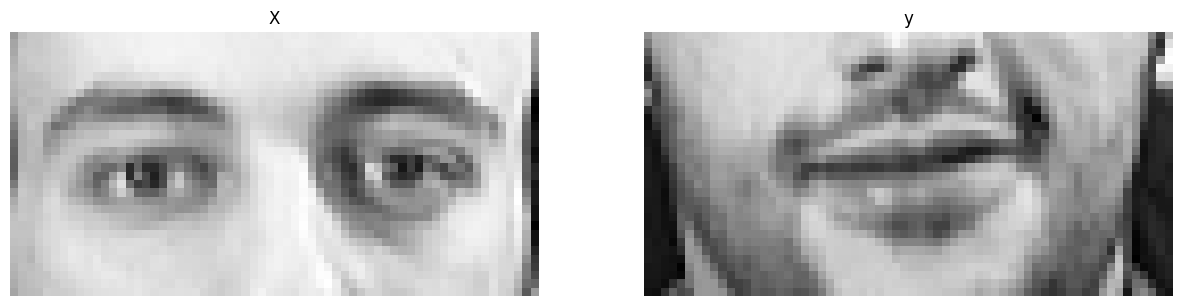

In [19]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [25]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_test['knn'] = knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')


Среднеквадратичная ошибка (MSE): 0.02
Средняя абсолютная ошибка (MAE): 0.10


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [27]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test['weighted_knn'] = weighted_knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])
r2 = r2_score(y_test, pred_test['knn'])

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')


MSE: 0.02
MAE: 0.10
R^2: 0.21


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [ ]:
# Ваш код здесь


#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [ ]:
# Ваш код здесь


#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [ ]:
# Ваш код здесь


А сейчас отрисуем все предсказания.

In [ ]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

In [ ]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, предыдущей работе, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [ ]:
# Ваш код здесь